In [3]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
import itertools
#warnings.filterwarnings("ignore")
matplotlib.rcParams['axes.labelsize'] 
matplotlib.rcParams['xtick.labelsize'] 
matplotlib.rcParams['ytick.labelsize'] 
matplotlib.rcParams['text.color'] = 'k'

In [4]:
path_to_data = 'https://raw.githubusercontent.com/bashirmohd/DataSceince/master/Time-series-prediction_production/amst_bost_in.csv'

In [21]:
df = pd.read_csv(path_to_data)

In [22]:
df.head()

,Days,Speed
0,16/10/2018 00:00,543.544807
1,16/10/2018 01:00,660.252326
2,16/10/2018 02:00,760.556908
3,16/10/2018 03:00,889.167762
4,16/10/2018 04:00,1177.313635


In [23]:
df.tail()

,Days,Speed
2155,13/01/2019 19:00,475.274037
2156,13/01/2019 20:00,458.203075
2157,13/01/2019 21:00,485.701395
2158,13/01/2019 22:00,735.878701
2159,13/01/2019 23:00,482.422127


In [8]:
df.isnull().sum()
df.dtypes

Days      object
Speed    float64
dtype: object

Text(0.5,1,'Aofa_Lond_in Link Speed Over Time In Hours')

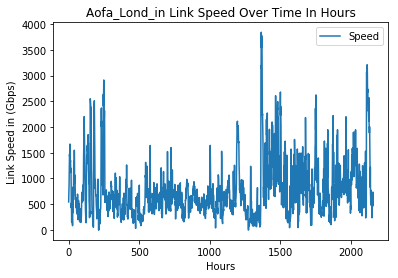

In [9]:
df.plot()
plt.xlabel('Hours')
plt.ylabel('Link Speed in (Gbps)')
plt.title('Aofa_Lond_in Link Speed Over Time In Hours')

In [10]:
df['Days'] =  pd.to_datetime(df['Days'], infer_datetime_format=True)

In [11]:
df = df.set_index('Days')

In [12]:
average_daily_speed = df.resample('D').mean()

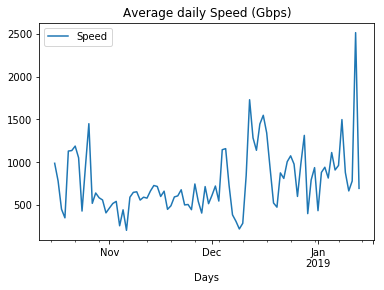

In [13]:
average_daily_speed.plot()
plt.title('Average daily Speed (Gbps)')
plt.show()

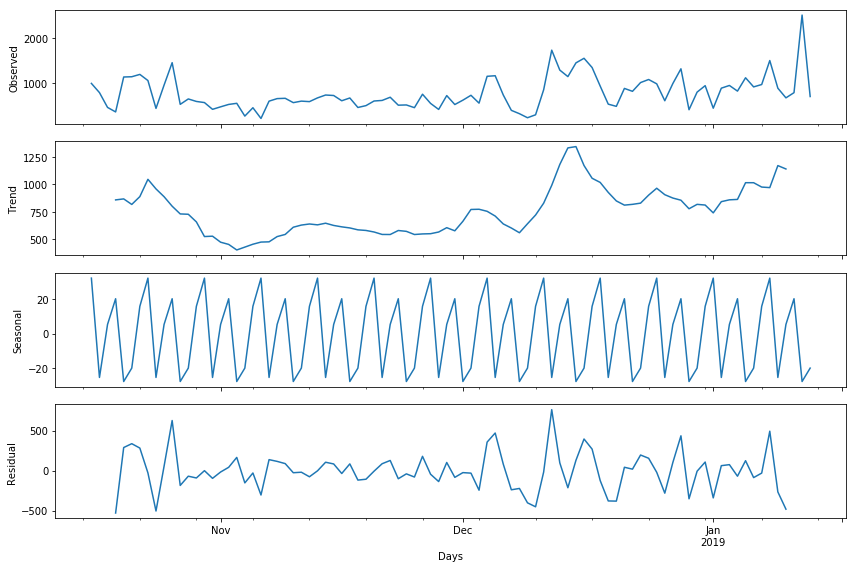

In [14]:
# Seaconal Decomposition of the Network Trace Data
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(average_daily_speed, model='additive')
fig = decomposition.plot()
plt.show()

In [15]:
# Define the p, d and q parameters to take any value between 0 and 2
# Generate all different combinations of p, q and q triplets
# Generate all different combinations of seasonal p, q and q triplets
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [16]:
print('Possible Parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Possible Parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [17]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [18]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(average_daily_speed,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1456.0934287715309
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1212.0620683141021
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1154.0437692398102
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:966.8612100529656
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1168.6165974169367
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1150.7356224923046
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:981.2896586491139
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:968.4103672259907
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1371.1061358567513
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1160.0988912419039
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1128.1780903999424
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:945.8503607450378
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1155.200076910738
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1126.7321592088772
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:973.6524533737925
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:947.6650198753978
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1312.511754281813
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1126.777577490281
A

In [19]:
#ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:935.5466187511622

In [20]:
mod = sm.tsa.statespace.SARIMAX(average_daily_speed,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3919      0.165      2.375      0.018       0.069       0.715
ma.L1         -0.9383      0.092    -10.249      0.000      -1.118      -0.759
ma.S.L12      -0.2530      0.174     -1.456      0.145      -0.594       0.088
sigma2      1.441e+05   1.59e+04      9.063      0.000    1.13e+05    1.75e+05
